## Numpy implementation of a simple RNN

In [3]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

# random noise input for this experiment
inputs = np.random.random((timesteps, input_features))

# initial state
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
# step through inputs and combining input with current state (previous output)
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    
    state_t = output_t

# final output tensor (timesteps, output_features)
final_output_sequence = np.concatenate(successive_outputs, axis=0)


## A recurrent layer in keras

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000,32))
# returns last output for each input sequence (batch_size, output_features)
#model.add(SimpleRNN(32))
# returns full state sequences (batch_size, timesteps, output_features)
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Another example where we stack several RNNs to improve representational power of the network
# - intermediate layers return full sequence of outputs

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## Applying SimpleRNN model to IMDB data

In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

# max number of words, cuts text off after 500 words, batch size
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data ...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train.shape: ',input_train.shape)
print('input_test.shape:', input_test.shape)

Loading data ...
25000 train sequences
25000 test sequences
Pad sequences (sample x time)
input_train.shape:  (25000, 500)
input_test.shape: (25000, 500)


In [10]:
# train the model with embedding and SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.6129 - acc: 0.6599 - val_loss: 0.4642 - val_acc: 0.8004
Epoch 2/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.3859 - acc: 0.8358 - val_loss: 0.3760 - val_acc: 0.8390
Epoch 3/10
20000/20000 [==============================] - 33s 2ms/step - loss

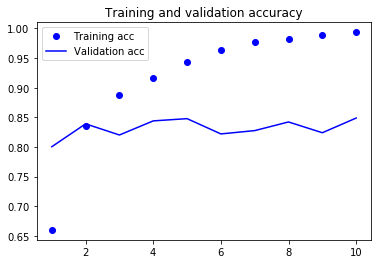

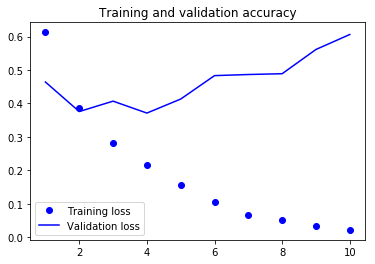

In [11]:
# plotting results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

## 6.2.3 A concrete LSTM example in Keras

In [14]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 133s 7ms/step - loss: 0.5044 - acc: 0.7586 - val_loss: 0.4344 - val_acc: 0.8034
Epoch 2/10
20000/20000 [==============================] - 105s 5ms/step - loss: 0.2942 - acc: 0.8825 - val_loss: 0.3664 - val_acc: 0.8718
Epoch 3/10
20000/20000 [==============================] - 106s 5ms/step - l